$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

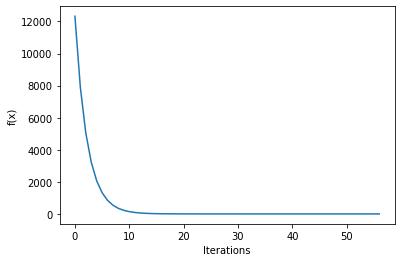

In [9]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

${\Large\text{Do not forget to rename the file before submission.}}$

#Ans 2:

Minimizer: [-99.99958844  24.99994388]

f(x): 1.7253033717248775e-07

In [10]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return k, x, fvals 

In [11]:
no_of_iterations = []
optimizer = []
function_values = []
tolerance = []
for i in range(1,11):
  my_tol = 10**-i
  k, opt, fval = find_minimizer(my_start_x, my_tol, my_steplength)
  tolerance.append(my_tol)
  no_of_iterations.append(k)
  optimizer.append(opt)
  function_values.append(fval[-1])

In [12]:
for i in range(10):
  print('For tolerance =',tolerance[i],'\nNo. of iterations :',no_of_iterations[i],'\nFinal Optimizer :',optimizer[i],'\nFinal Function Value :',function_values[i],'\n')

For tolerance = 0.1 
No. of iterations : 35 
Final Optimizer : [-99.9553787   24.99391528] 
Final Function Value : 0.0020280843668995063 

For tolerance = 0.01 
No. of iterations : 45 
Final Optimizer : [-99.99520882  24.99934666] 
Final Function Value : 2.3382220797474075e-05 

For tolerance = 0.001 
No. of iterations : 56 
Final Optimizer : [-99.99958844  24.99994388] 
Final Function Value : 1.7253033717248775e-07 

For tolerance = 0.0001 
No. of iterations : 66 
Final Optimizer : [-99.99995581  24.99999397] 
Final Function Value : 1.989139359193299e-09 

For tolerance = 1e-05 
No. of iterations : 76 
Final Optimizer : [-99.99999526  24.99999935] 
Final Function Value : 2.293321544605827e-11 

For tolerance = 1e-06 
No. of iterations : 87 
Final Optimizer : [-99.99999959  24.99999994] 
Final Function Value : 1.6921726745458407e-13 

For tolerance = 1e-07 
No. of iterations : 97 
Final Optimizer : [-99.99999996  24.99999999] 
Final Function Value : 1.950942200128245e-15 

For toleranc

#Ans 3:

The values of No. of iterations, final optimizer, final function value are printed above for each value of tolerance.

The required plot is plotted below.

We can observe that as the tolerance value reduces the no. of iterations increase rapidly.

We can also observe that the function value reduces as the tolerance reduces, and the value of the optimizer saturates after a point .

Text(0, 0.5, 'No. of iterations')

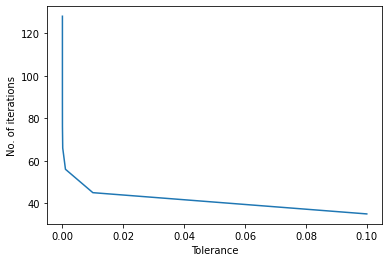

In [13]:
plt.plot(tolerance, no_of_iterations)
plt.xlabel('Tolerance')
plt.ylabel('No. of iterations')

In [14]:
step_length_values = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
my_tol = 1e-5
no_of_iterations = []
optimizer = []
function_values = []
tolerance = []
for i in range(len(step_length_values)):
  k, opt, fval = find_minimizer(my_start_x, my_tol, step_length_values[i])
  no_of_iterations.append(k)
  optimizer.append(opt)
  function_values.append(fval[-1])

In [15]:
for i in range(10):
  print('For step length =',step_length_values[i],'\nNo. of iterations :',no_of_iterations[i],'\nFinal Optimizer :',optimizer[i],'\nFinal Function Value :',function_values[i],'\n')

For step length = 0.0001 
No. of iterations : 84571 
Final Optimizer : [-99.99999505  24.99999932] 
Final Function Value : 2.49936770204995e-11 

For step length = 0.001 
No. of iterations : 8450 
Final Optimizer : [-99.99999505  24.99999933] 
Final Function Value : 2.494219709847674e-11 

For step length = 0.01 
No. of iterations : 838 
Final Optimizer : [-99.99999512  24.99999933] 
Final Function Value : 2.4304673044883465e-11 

For step length = 0.1 
No. of iterations : 76 
Final Optimizer : [-99.99999526  24.99999935] 
Final Function Value : 2.293321544605827e-11 

For step length = 0.2 
No. of iterations : 34 
Final Optimizer : [-99.99999685  24.99999957] 
Final Function Value : 1.011747066175869e-11 

For step length = 0.4 
No. of iterations : 11 
Final Optimizer : [-99.99999775  24.99999969] 
Final Function Value : 5.169479687800271e-12 

For step length = 0.5 
No. of iterations : 1 
Final Optimizer : [-100.   25.] 
Final Function Value : 0.0 

For step length = 0.6 
No. of iter

#Ans 4:

The values of No. of iterations, final optimizer, final function value are printed above for each value of step length.

The required plot is plotted below.

We can observe that as the step length value reduces the no. of iterations increase rapidly.

We can also observe that the function value reduces as the step length reduces but negligibly, and that at step length = 0.5, the function attains a minimum of 0. The value of the optimizer negligibly fluctuates.

Text(0, 0.5, 'No. of iterations')

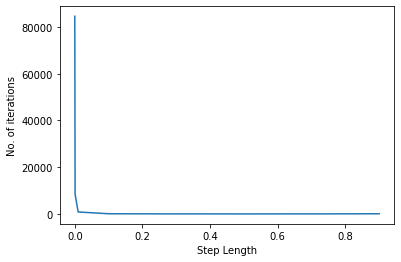

In [16]:
plt.plot(step_length_values, no_of_iterations)
plt.xlabel('Step Length')
plt.ylabel('No. of iterations')

In [17]:
start_x = [(10000, 10000),(500, 0),(0, 1000),(1, 1),(-500, -2)]
my_tol = 1e-5
step_length = 0.1
no_of_iterations = []
optimizer = []
function_values = []
for i in range(len(start_x)):
  my_start_x = np.array(start_x[i])
  k, opt, fval = find_minimizer(my_start_x, my_tol, step_length)
  no_of_iterations.append(k)
  optimizer.append(opt)
  function_values.append(fval[-1])

In [18]:
for i in range(len(start_x)):
  print('For starting point :',start_x[i],'\nNo. of iterations :',no_of_iterations[i],'\nFinal Optimizer :',optimizer[i],'\nFinal Function Value :',function_values[i],'\n')

For starting point : (10000, 10000) 
No. of iterations : 98 
Final Optimizer : [-99.99999679  25.00000317] 
Final Function Value : 2.0414342669998657e-11 

For starting point : (500, 0) 
No. of iterations : 84 
Final Optimizer : [-99.99999566  24.99999982] 
Final Function Value : 1.888746375147865e-11 

For starting point : (0, 1000) 
No. of iterations : 86 
Final Optimizer : [-99.99999954  25.00000452] 
Final Function Value : 2.060780080476227e-11 

For starting point : (1, 1) 
No. of iterations : 76 
Final Optimizer : [-99.99999564  24.99999896] 
Final Function Value : 2.0052840841640608e-11 

For starting point : (-500, -2) 
No. of iterations : 82 
Final Optimizer : [-100.00000452   24.99999969] 
Final Function Value : 2.055190630073527e-11 



#Ans 5:

The values of No. of iterations, final optimizer, final function value are printed above for each starting value of x.

We can observe that the closer the inital x is to the optimizer the less no. of iterations are required but the difference is not too much in comparison to the difference between the points.

We can observe that we reach almost the same optimizer and final function value in each case.